In [8]:
%matplotlib inline

import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
# import seaborn as sns

-4.82321334772 4.61916826597 -4.79880323911 3.106901356
['NorEast', 'SouEast', 'Xxxx', 'SouWest', 'NorWest']


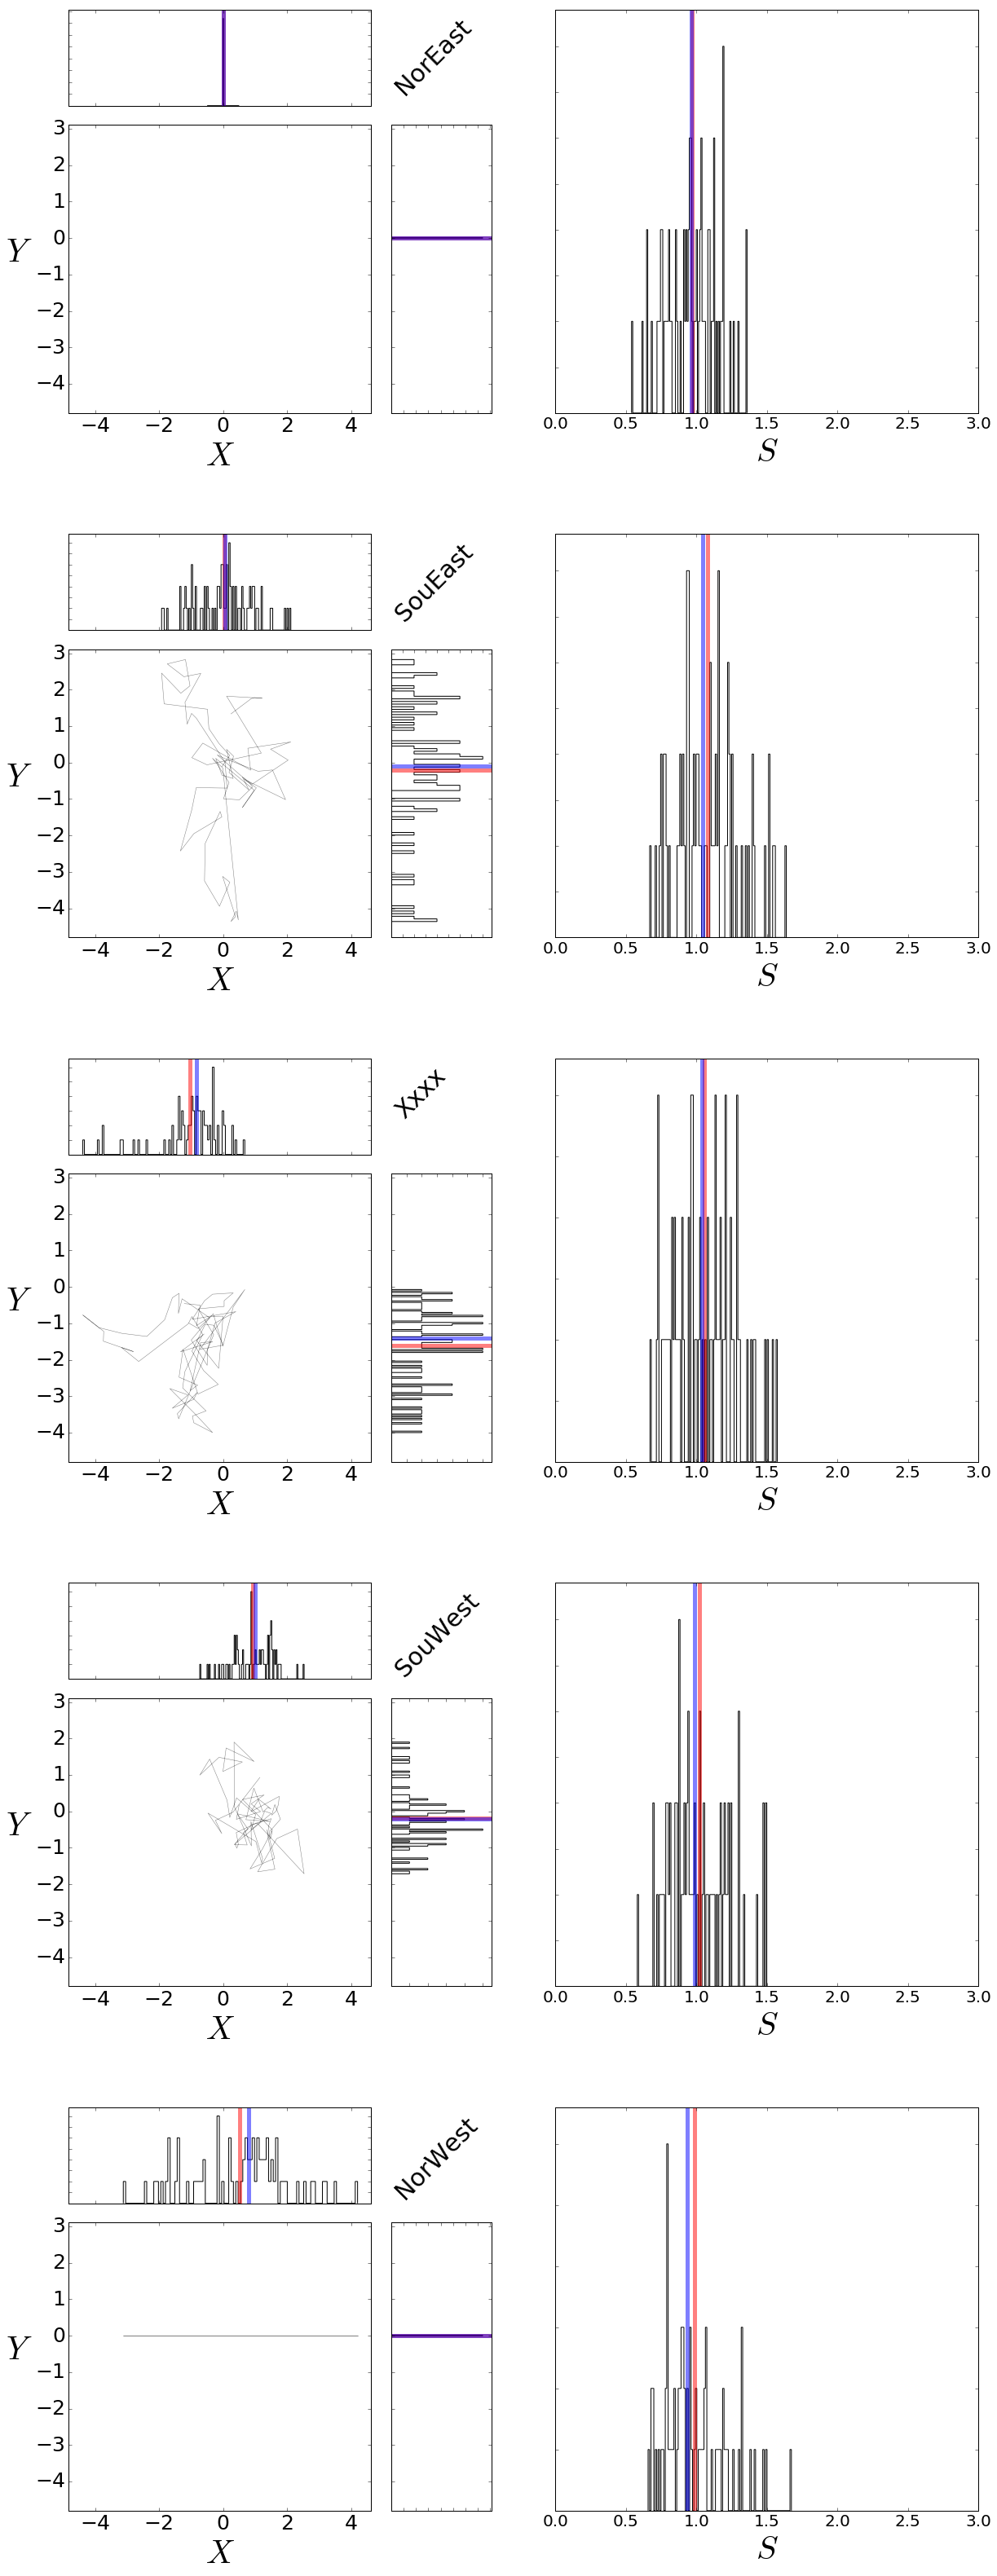

In [128]:
# filename = 'test_case_1_positions_sample.txt'
filename = 'solutions/test_case_1_positions.txt'

df = pd.read_table(filename)

candidates = list(set([ x.split('_')[0] for x in df.columns.values if x[0] != 'T' ]))

xmin = df[[ K+'_x' for K in candidates ]].min().min()*1.1
xmax = df[[ K+'_x' for K in candidates ]].max().max()*1.1
ymin = df[[ K+'_y' for K in candidates ]].min().min()*1.1
ymax = df[[ K+'_y' for K in candidates ]].max().max()*1.1
print xmin, xmax, ymin, ymax

fig = plt.figure(figsize=(20,11*len(candidates)))

gs = gridspec.GridSpec(len(candidates), 2)
gs.update(wspace=0.15,hspace=0.3)

bin_width = 100

print candidates

for i in range(len(candidates)):
#     print i, 2*i+1, 2*i+2
    K = candidates[i]
    x = df[K+'_x']
    y = df[K+'_y']
    s = df[K+'_s']
    
    # Left figure. Trace and histogram of positions.
    gs0 = gridspec.GridSpecFromSubplotSpec(2, 2,
                                           subplot_spec=gs[2*i],
                                           width_ratios=[3,1],wspace=0.1,
                                           height_ratios=[1,3],hspace=0.1
                                          )
    
    ax1 = plt.subplot(gs0[0]) # X distribution
    ax2 = plt.subplot(gs0[1]) # Title
    ax3 = plt.subplot(gs0[2]) # MCMC
    ax4 = plt.subplot(gs0[3]) # Y distribution  
    
    ## X histogram
    n, bins, patches = ax1.hist(x,bin_width,
                                 histtype='step',
                                 color='black')
    ax1.axis([xmin,xmax,0.0,1.1*max(n)])
    ax1.plot([np.mean(x),np.mean(x)],[0.0,1.1*max(n)],'r-',linewidth=5.0,alpha=0.5)
    ax1.plot([np.median(x),np.median(x)],[0.0,1.1*max(n)],'b-',linewidth=5.0,alpha=0.5)
    ax1.tick_params(labelleft='off',labelbottom='off')
#     ax1.set_title('Position',fontsize=28)
    
    ## Title
    
    ax2.axis([0.0,1.0,0.0,1.0])
    ax2.annotate(K, xy=(0,0.75), fontsize=30, rotation=45)
    ax2.axis('off')
    
    ## MCMC
    ax3.plot(df[K+'_x'],df[K+'_y'],
             linewidth=0.5,
             alpha=0.5,
             color='black')
    ax3.axis([xmin,xmax,ymin,ymax])
    ax3.tick_params(labelsize=25)
    ax3.set_xlabel(r'$X$',fontsize=40)
    ax3.set_ylabel(r'$Y$',fontsize=40,rotation=0,labelpad=20)
    
    ## Y distribution
    n, bins, patches = ax4.hist(y,bin_width,
                                 orientation='horizontal',
                                 histtype='step',
                                 color='black')
    ax4.axis([0.0,1.1*max(n),ymin,ymax])
    ax4.plot([0.0,1.1*max(n)],[np.mean(y),np.mean(y)],'r-',linewidth=5.0,alpha=0.5)
    ax4.plot([0.0,1.1*max(n)],[np.median(y),np.median(y)],'b-',linewidth=5.0,alpha=0.5)
    ax4.tick_params(labelleft='off',labelbottom='off')
        
    # Strength distribution
    gs1 = gridspec.GridSpecFromSubplotSpec(1, 1, subplot_spec=gs[2*i+1])
    
    ax5 = plt.subplot(gs1[0])
    n, bins, patches = ax5.hist(s,bin_width,
                                histtype='step',
                               color='black')
    ax5.axis([0.0,3.0,0.0,1.1*max(n)])
    ax5.plot([np.mean(s),np.mean(s)],[0.0,1.1*max(n)],'r-',linewidth=5.0,alpha=0.5)
    ax5.plot([np.median(s),np.median(s)],[0.0,1.1*max(n)],'b-',linewidth=5.0,alpha=0.5)
    ax5.tick_params(labelleft='off',labelsize=20)
    ax5.set_xlabel(r'$S$',fontsize=40)
    

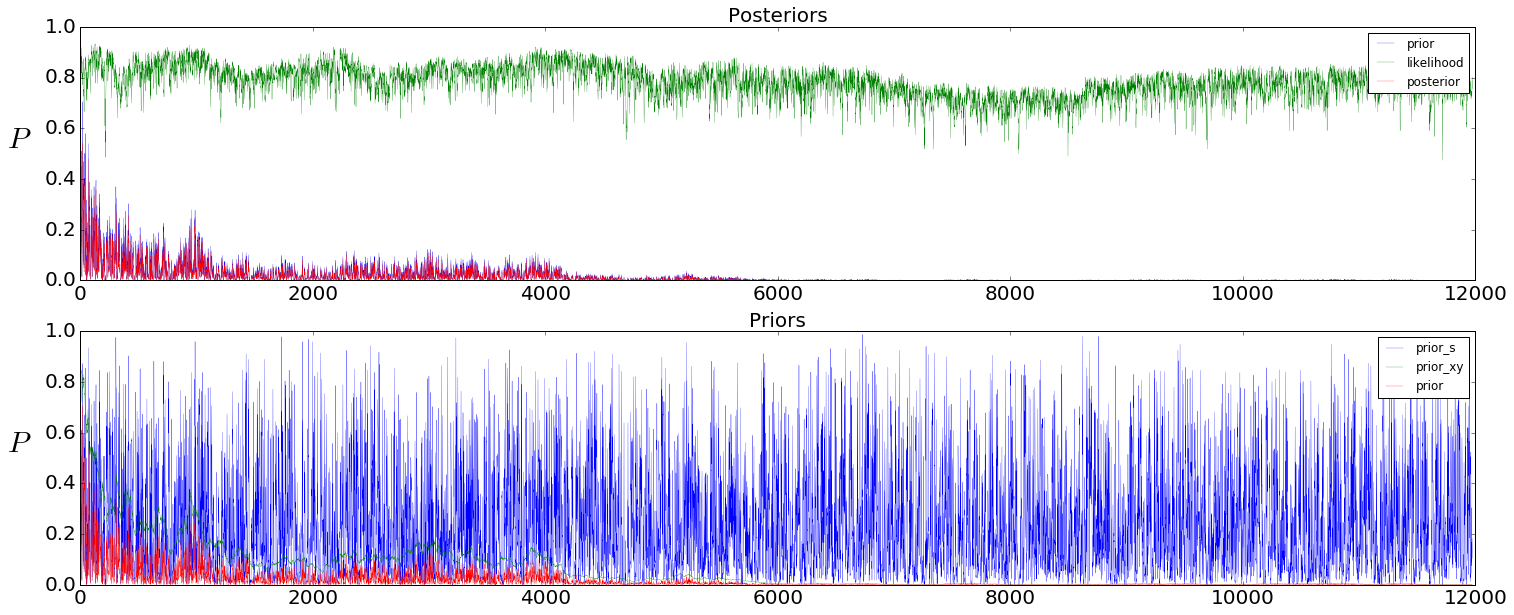

In [132]:
filename = 'solutions/test_case_1_probabilities.txt'
df = pd.read_table(filename)

fig = plt.figure(figsize=(25,10))


ix = {'Posteriors':[3,4,5],'Priors':[1,2,3]}

n = 0
for grp in ix.keys():
    n += 1
    ax = fig.add_subplot(2,1,n)
    for prob in df.columns.values[ix[grp]]:
        plt.plot(df['step_no'],df[prob],label=prob,linewidth=0.25)

    plt.title(grp,fontsize=20)
    plt.legend()
    plt.ylabel(r'$P$',fontsize=30,labelpad=25,rotation=0)
    plt.tick_params(labelsize=20)